<a href="https://colab.research.google.com/github/columbia-data-club/meetings/blob/main/february_09_Intro_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![A blue background with the Python logo and the words Data Club on it](https://raw.githubusercontent.com/columbia-data-club/meetings/main/assets/images/data-club-python.png)

## Introduction to Pandas

Feb 9rd, 2023

by [Roger Creel](https://rogercreel.com) for the [Columbia Data Club](https://github.com/columbia-data-club/), modified from notebooks by Isha Shah and others in the Data club past

This notebook underpins a ~60-75 minute presentation that introduces Pandas to complete beginners to Python and to programming. 


# **Intro to Pandas**
*Presented by Columbia University Libraries*
***

Welcome to the Columbia University Library's Intro to Pandas course! These are our objectives:

* Understanding what it *means* to use data
* How to think critically and work responsibly with imperfect data
* Fundamentals of data wrangling using Pandas
* Awareness of Python's statistical and visualization capabilities
*   Awareness of available datasets and where to find them
* An insatiable desire to learn more about using data!






## **Principles of data analysis**
***
No matter the context in which you're using data, there will **always** be a few principles you must follow. At the end of the day, you *are* doing science - you are using empirical observations to test hypotheses (and occasionally, to predict the future based on these hypotheses). Therefore, it is important to follow the same principles that guide scientific inquiry. These are in use far beyond academia. Regardless of where you work, whether a tech firm, bank, non-profit, or research institution, your analytical work **must** be:
1. Well-documented
2. Conscientious in reducing bias (the same way we randomize trials and only collect the data we need to answer a specific question, we have to make sure our data are clean, examined for potential bias, and are suited to the question we want to answer)
2. Reproducible (commenting and code sharing are crucial)
3. Responsibly and clearly communicated (you've done all the work, and now it's important to get it out in the world! Communicating the results of data analyses can be very difficult, especially to folks who don't have a background in it. It is your responsibility to do the best you can in stating what your research can and can't answer, and to make sure that any communication about the data comes from the data - don't make unfounded leaps, or allow others to)

Throughout this guide, you will see a subtitle for each section that shows you the *tool* we are using to perform each part of data analysis. This is to emphasize the greater importance of the *general concepts and principles* of data analysis that are constant across any language or context, rather than the tools used.

## **Getting started**
### *(with Google Colab)*

Topics to be covered:
1. What is Python?
2. Why does it matter?
3. How can you use Python? (IDEs, notebooks, terminal, Colab)
4. What are packages and why do we need them?
5. Basic familiarity with CoLab (shareability, power)
6. Pitfalls of using CoLab
7. Why pandas? Pandas is an open-source library that provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language.


## **Data import and quality checking** 
### *(with Pandas)*
***
Topics to be covered, all demoed using NYC taxi dataset:

1. Importing csv, txt, excel files
2. Looking at (an extract) of the dataset (.head), assumptions about the data, and the data type for different fields + characteristics of each type
3. Data quality checking
4. The most common ways in which data are imperfect (missing data, duplication, truncation, misleading names)
5. Larger questions you should ask about your data (how was this collected? Is this helpful in answering the question I already have, or should I come up with new questions I can ask this particular data with confidence?)


In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import requests
import pyarrow



In [ ]:
# Run following so that we can see all outputs, not just last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We'll first download a month of data from the New York Taxi & Limousine Commission (TLC) [Trip Record Data website](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). 

In [ ]:
# get the URL of one month's data from New York Suway 
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet"

r = requests.get(url) # create HTTP response object
with open("yellow_tripdata_2021-01.parquet",'wb') as f:

      f.write(r.content)

# open parquet file
df = pd.read_parquet('yellow_tripdata_2021-01.parquet')
df.head()

21686067

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


We've saved the file locally in the format TLC gave it to us: an Apache `parquet` file.  

This is an efficient file format, but you'll encounter the `csv` file type more often -- `csv` stands for **C**omma **S**eparated **V**alue -- so let's learn how to save the dataframe we just loaded as a `csv` file. 

In [ ]:
df.to_csv('yellow_tripdata_2021-01.csv', index=False)

Now let's load the file as you typically might load a file in pandas, with the `read_csv` command: 

In [ ]:
taxi = pd.read_csv('yellow_tripdata_2021-01.csv', 
                 index_col=None, 
                 parse_dates=[
                     "tpep_pickup_datetime",	"tpep_dropoff_datetime"
                 ])

# Look at the 'head'of the dataframe, i.e. the top 5 rows
taxi.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


These columns have long, hard-to-read names.  We'll want to make them shorter and drop the less useful ones.

## **Refresher on Python data structures**

But before we do that, let's review a few key data structures in python and pandas:

In [ ]:
# Lists
listex = [1, 2, 3, 4, "python", "makes", "rory", "roar"]
listex[1]
listex[0:5]

# Iterable

2

[1, 2, 3, 4, 'python']

In [ ]:
# Dictionaries
dictex = {"rory" : "the lion", "columbia": "the university", "founded": 1754}
dictex["founded"]
dictex["rory"]

# Iterable

1754

'the lion'

In [ ]:
# Pandas dataframe
type(taxi)

# Think excel

pandas.core.frame.DataFrame

Now let's clean up our data.  

In [ ]:
taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

We don't need all the columns, and the columns we do need have cumbersome names.  Let's fix that. 

In [ ]:
columns = {
            # 'VendorID', 
          'tpep_pickup_datetime':'pickup',
          'tpep_dropoff_datetime':'dropoff',
            'passenger_count':'passengers', 
          'trip_distance':'distance', 
          # 'RatecodeID',
          # 'store_and_fwd_flag',
          # 'PULocationID', 
          #  'DOLocationID',
          'payment_type':'payment_type',
          'fare_amount':'fare',
          'extra':'extra',
          'mta_tax':'tax', 
          'tip_amount':'tip', 
          'tolls_amount':'tolls', 
          'improvement_surcharge':'improvement_surcharge',
          'total_amount':'total_fare', 
          'congestion_surcharge':'congestion_tax', 
          'airport_fee':'airport_fee'
          }

# choose only columns that are keys in dictionary
taxi = taxi[list(columns.keys())]

# rename columns by values of dictionary
taxi = taxi.rename(columns=columns)

taxi.head()

,pickup,dropoff,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


In [ ]:
# Pandas series
type(taxi["pickup"])

# Column

pandas.core.series.Series

In [ ]:
# What are the data types of our fields?
taxi.dtypes

pickup                   datetime64[ns]
dropoff                  datetime64[ns]
passengers                      float64
distance                        float64
payment_type                      int64
fare                            float64
extra                           float64
tax                             float64
tip                             float64
tolls                           float64
improvement_surcharge           float64
total_fare                      float64
congestion_tax                  float64
airport_fee                     float64
dtype: object

In [ ]:
# Descriptions
taxi.describe(include = "all")

<ipython-input-14-8fe46fd659a2>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  taxi.describe(include = "all")


,pickup,dropoff,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee
count,1369769,1369769,1.271417e+06,1.369769e+06,1.369769e+06,1.369769e+06,1.369769e+06,1.369769e+06,1.369769e+06,1.369769e+06,1.369769e+06,1.369769e+06,1.271417e+06,5.0
unique,939020,935992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-01-14 13:52:00,2021-01-09 11:01:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2008-12-31 23:05:14,2008-12-31 23:07:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-02-22 16:52:16,2021-02-22 16:56:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.411508e+00,4.631983e+00,1.188578e+00,1.209663e+01,9.705133e-01,4.930412e-01,1.918098e+00,2.477473e-01,2.969412e-01,1.747440e+01,2.239047e+00,0.0
std,NaN,NaN,1.059831e+00,3.939037e+02,5.776546e-01,1.291337e+01,1.231258e+00,7.632059e-02,2.597151e+00,1.672761e+00,4.222168e-02,1.469342e+01,7.989435e-01,0.0
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,0.0
25%,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00,0.0


**What are some observations you can make from the table above?**

Let's go column by column:

*Pick-up and drop-off dates and times:*
* The earliest date in our dataset is 12/31/2008
<!-- * The maximum date looks unrealistic (2081?) -->
* There are nearly 1,370,000 rows in our dataset, but only about 939,000 unique pickup values and only 936,000 dropoff values. Why? Why would there be fewer unique dropoff & pickup date values than total values, and fewer dropoffs than pickups?

*Moving onto passengers and distance:*
* What does having zero passengers mean?
* What does having zero distance mean?
* Are these distance values intuitive?

*Fares and payment:*
* Why would there be a negative number for a fare or tip?
* What does the column "payment type" mean here, and why is it numeric?
* There was a $7,600 cab ride? Was that a mistake?

Luckily, we can take a deeper dive into questions!

Let's start with pick-up and drop-off times:





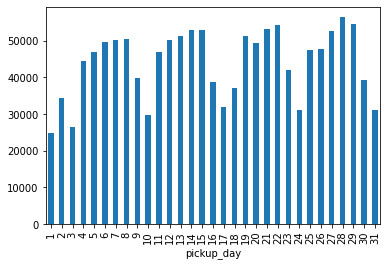

In [ ]:
# Start with a simple histogram
taxi["pickup_day"] = taxi["pickup"].dt.day

# First with months
taxi.groupby("pickup_day")["pickup"].count().plot(kind="bar")

In [ ]:
# Then with dates
taxi.groupby("pickup")["pickup"].count().plot(kind = "bar")

You'll notice that the above takes *forever*. It actually causes our kernel to fail.  Why is this?

Because we're working on 1,370,000 rows of data! And this particular visualization is trying to account for every single point, which in this case is every single pickup date and time. This is one of the first hurdles you will likely experience when working with large and interesting datasets. So, what can you do to analyze the data more quickly?

* Subset the data
* Select a random sample
* Use only the information needed 

But almost all of these require working with the data in a form other than the one it's in already. This brings us to:

## **Data wrangling**
### *(using Pandas)*
***
Topics to be covered:
1. Math and string operations between columns 
2. Summarizing
aside: + you can and should define your own functions (we said that code should be reproducible - if others are using your code or looking at it, functions are a good way to keep things in order)
3. Reshaping
4. Merging (will need to find another dataset to merge with)



,pickup,dropoff,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee,pickup_day,pickup_year
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN,1,2021
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN,1,2021
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN,1,2021
3,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN,1,2021
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN,1,2021


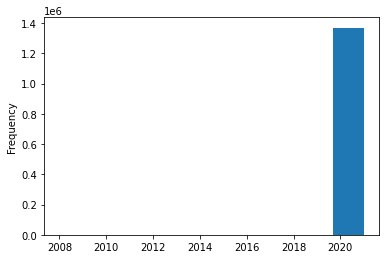

In [ ]:
# Let's go ahead and first try to look at just the year of the pickup to see 
# what the deal with those 2008 dates is:

taxi["pickup_year"] = taxi["pickup"].dt.year
taxi.head()
taxi["pickup_year"].plot(kind = "hist")

Wait a minute, it looks like the minimum year is 2008, but that all of the trips are in 2020. What's going on here?

In [ ]:
taxi[taxi["pickup_year"] < 2020]

,pickup,dropoff,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee,pickup_day,pickup_year
518899,2009-01-01 00:10:40,2009-01-01 00:23:59,1.0,1.46,2,9.5,0.0,0.5,0.0,0.0,0.3,10.3,0.0,NaN,1,2009
1015552,2008-12-31 23:05:14,2008-12-31 23:07:22,1.0,0.00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,31,2008
1152322,2009-01-01 00:26:37,2009-01-01 00:34:54,1.0,4.09,2,13.0,0.5,0.5,0.0,0.0,0.3,14.3,0.0,NaN,1,2009
1178911,2009-01-01 00:03:15,2009-01-01 00:14:19,6.0,1.31,2,8.5,0.0,0.5,0.0,0.0,0.3,11.8,2.5,NaN,1,2009


Okay...there are just a few of these. However, this is not something we could have figured out by the histogram, and we don't know how many such rows there are. How can we get a sense of how many entries are from before 2018?
* Make a plot (tried above) 
* List the rows (tried above)
* Count!

In [ ]:
# Count rows where year < 2018
taxi[taxi["pickup_year"] < 2020].count()

pickup                   4
dropoff                  4
passengers               4
distance                 4
payment_type             4
fare                     4
extra                    4
tax                      4
tip                      4
tolls                    4
improvement_surcharge    4
total_fare               4
congestion_tax           4
airport_fee              0
pickup_day               4
pickup_year              4
dtype: int64

Huh, there are 4 such rows. How do we proceed?
* We can drop them
* We can investigate them further to see if there's something in common with them
* We can change the year and assume 2020

Let's investigate!

array([2021, 2020, 2009, 2008])

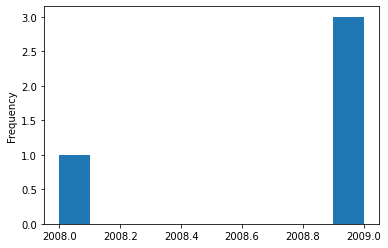

In [ ]:
# What are the summary stats of these rows and do they differ from the other data?
taxi["pickup_year"].unique() 


taxi[taxi["pickup_year"] < 2020]["pickup_year"].plot(kind = "hist")

In [ ]:
# Describe these early-year rows
taxi[taxi["pickup_year"] < 2020].describe(include = "all")

<ipython-input-23-e0fa6afec332>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  taxi[taxi["pickup_year"] < 2020].describe(include = "all")


,pickup,dropoff,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee,pickup_day,pickup_year
count,4,4,4.00,4.000000,4.0,4.000000,4.000,4.000,4.0,4.0,4.000,4.000000,4.000,0.0,4.0,4.00
unique,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009-01-01 00:10:40,2009-01-01 00:23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2008-12-31 23:05:14,2008-12-31 23:07:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2009-01-01 00:26:37,2009-01-01 00:34:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.25,1.715000,2.0,7.750000,0.125,0.375,0.0,0.0,0.225,9.100000,0.625,NaN,8.5,2008.75
std,NaN,NaN,2.50,1.713758,0.0,5.515131,0.250,0.250,0.0,0.0,0.150,6.287024,1.250,NaN,15.0,0.50
min,NaN,NaN,1.00,0.000000,2.0,0.000000,0.000,0.000,0.0,0.0,0.000,0.000000,0.000,NaN,1.0,2008.00
25%,NaN,NaN,1.00,0.982500,2.0,6.375000,0.000,0.375,0.0,0.0,0.225,7.725000,0.000,NaN,1.0,2008.75


In [ ]:
# Compare with rows from 2018
taxi[taxi["pickup_year"] >= 2020].describe(include = "all")

<ipython-input-24-e4970728dec6>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  taxi[taxi["pickup_year"] >= 2020].describe(include = "all")


,pickup,dropoff,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee,pickup_day,pickup_year
count,1369765,1369765,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.271413e+06,5.0,1.369765e+06,1.369765e+06
unique,939016,935988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-01-14 13:52:00,2021-01-09 11:01:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-12-31 13:44:02,2020-10-13 12:03:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-02-22 16:52:16,2021-02-22 16:56:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.411505e+00,4.631991e+00,1.188575e+00,1.209664e+01,9.705158e-01,4.930415e-01,1.918103e+00,2.477480e-01,2.969414e-01,1.747443e+01,2.239052e+00,0.0,1.649425e+01,2.021000e+03
std,NaN,NaN,1.059825e+00,3.939042e+02,5.776538e-01,1.291339e+01,1.231258e+00,7.631953e-02,2.597153e+00,1.672764e+00,4.222098e-02,1.469344e+01,7.989373e-01,0.0,8.643264e+00,3.417705e-03
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,0.0,1.000000e+00,2.020000e+03
25%,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00,0.0,9.000000e+00,2.021000e+03


In [ ]:
# From these basic summarizations (not testing for significance), 
# it looks like these rows aren't too different from the post-2018 rows - 
# so it's probably safe to go ahead and drop them.

taxi = taxi[taxi["pickup_year"] >= 2020]

Now that we've got the general hang of cleaning data, let's go ahead and clean up the anomalies in passenger number, distance, fare, and payment.

,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee,pickup_day,pickup_year
count,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.271413e+06,5.0,1.369765e+06,1.369765e+06
mean,1.411505e+00,4.631991e+00,1.188575e+00,1.209664e+01,9.705158e-01,4.930415e-01,1.918103e+00,2.477480e-01,2.969414e-01,1.747443e+01,2.239052e+00,0.0,1.649425e+01,2.021000e+03
std,1.059825e+00,3.939042e+02,5.776538e-01,1.291339e+01,1.231258e+00,7.631953e-02,2.597153e+00,1.672764e+00,4.222098e-02,1.469344e+01,7.989373e-01,0.0,8.643264e+00,3.417705e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,0.0,1.000000e+00,2.020000e+03
25%,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00,0.0,9.000000e+00,2.021000e+03
50%,1.000000e+00,1.700000e+00,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.380000e+01,2.500000e+00,0.0,1.600000e+01,2.021000e+03
75%,1.000000e+00,3.020000e+00,1.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.750000e+00,0.000000e+00,3.000000e-01,1.912000e+01,2.500000e+00,0.0,2.400000e+01,2.021000e+03
max,8.000000e+00,2.631633e+05,4.000000e+00,6.960500e+03,8.250000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00,0.0,3.100000e+01,2.021000e+03


passengers
0.0     26726
1.0    966233
2.0    161671
3.0     43935
4.0     16391
5.0     31089
6.0     25361
7.0         5
8.0         2
Name: passengers, dtype: int64

,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee,pickup_day,pickup_year
count,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,5.0,1.244687e+06,1.244687e+06
mean,1.441813e+00,2.698804e+00,1.279772e+00,1.101427e+01,9.496490e-01,4.927544e-01,1.940081e+00,1.789089e-01,2.966399e-01,1.642643e+01,2.238591e+00,0.0,1.651971e+01,2.021000e+03
std,1.050547e+00,1.025307e+02,4.903185e-01,1.212042e+01,1.208798e+00,7.875463e-02,2.645107e+00,1.541900e+00,4.426075e-02,1.408918e+01,8.002331e-01,0.0,8.648424e+00,3.585315e-03
min,1.000000e+00,0.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,0.0,1.000000e+00,2.020000e+03
25%,1.000000e+00,9.800000e-01,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.056000e+01,2.500000e+00,0.0,9.000000e+00,2.021000e+03
50%,1.000000e+00,1.610000e+00,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.350000e+01,2.500000e+00,0.0,1.600000e+01,2.021000e+03
75%,1.000000e+00,2.790000e+00,2.000000e+00,1.200000e+01,2.500000e+00,5.000000e-01,2.700000e+00,0.000000e+00,3.000000e-01,1.780000e+01,2.500000e+00,0.0,2.400000e+01,2.021000e+03
max,8.000000e+00,1.143282e+05,4.000000e+00,6.960500e+03,7.000000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00,0.0,3.100000e+01,2.021000e+03


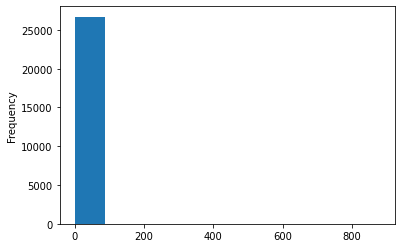

In [ ]:
# Cleaning for passengers, distance, fare, and payment
taxi.describe()

# Cleaning passengers
taxi.groupby("passengers")["passengers"].count()

# There are a few rides with zero passengers, which seems suspect. Let's drop.
# (We could have also investigated what the fare is for these rides:)
taxi[taxi["passengers"] == 0]["fare"].plot(kind = "hist")
# This shows that many of these do have some nonzero fare - so they're 
# definitely suspect, and also irrelevant to the questions we want to ask.
taxi = taxi[taxi["passengers"] > 0]
taxi.describe()

In [ ]:
# Cleaning for distance, fare, payment
taxi.describe()

# Remove trips with 0 distance, after checking how many there are
# Here, it might be good to have a dummy variable rather than plotting a
# histogram or table with all values
taxi["distance"].groupby([taxi["distance"] == 0]).count()

# Looks like these represent just 18.2k values, let's drop
# In another world we could try to interpolate these values using fare,
# but these are not relevant to our research question.

,passengers,distance,payment_type,fare,extra,tax,tip,tolls,improvement_surcharge,total_fare,congestion_tax,airport_fee,pickup_day,pickup_year
count,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,1.244687e+06,5.0,1.244687e+06,1.244687e+06
mean,1.441813e+00,2.698804e+00,1.279772e+00,1.101427e+01,9.496490e-01,4.927544e-01,1.940081e+00,1.789089e-01,2.966399e-01,1.642643e+01,2.238591e+00,0.0,1.651971e+01,2.021000e+03
std,1.050547e+00,1.025307e+02,4.903185e-01,1.212042e+01,1.208798e+00,7.875463e-02,2.645107e+00,1.541900e+00,4.426075e-02,1.408918e+01,8.002331e-01,0.0,8.648424e+00,3.585315e-03
min,1.000000e+00,0.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,0.0,1.000000e+00,2.020000e+03
25%,1.000000e+00,9.800000e-01,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.056000e+01,2.500000e+00,0.0,9.000000e+00,2.021000e+03
50%,1.000000e+00,1.610000e+00,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.350000e+01,2.500000e+00,0.0,1.600000e+01,2.021000e+03
75%,1.000000e+00,2.790000e+00,2.000000e+00,1.200000e+01,2.500000e+00,5.000000e-01,2.700000e+00,0.000000e+00,3.000000e-01,1.780000e+01,2.500000e+00,0.0,2.400000e+01,2.021000e+03
max,8.000000e+00,1.143282e+05,4.000000e+00,6.960500e+03,7.000000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00,0.0,3.100000e+01,2.021000e+03


distance
False    1226399
True       18288
Name: distance, dtype: int64

In [ ]:

# Also remove the one trip that more than 1000 miles, which seems unrealistic
taxi["distance"].groupby([taxi["distance"] > 1000]).count()


distance
False    1244686
True           1
Name: distance, dtype: int64

In [ ]:
taxi = taxi[(taxi["distance"] > 0) & (taxi["distance"] < 1000)]

taxi["distance"].describe()

count    1.226398e+06
mean     2.645827e+00
std      3.421138e+00
min      1.000000e-02
25%      1.000000e+00
50%      1.640000e+00
75%      2.800000e+00
max      4.277000e+02
Name: distance, dtype: float64

In [ ]:
# Looks like there is in fact at least one trip that had a distance traveled of 
# 0.01. Is this reasonable? Should we have used a higher cutoff than 0?
# Let's calculate in feet!
print(f"0.01 mile = {0.01 * 5280} feet") # number of feet in a mile

# Ok, does it make sense to have a trip that was only 52 feet long?
# One NYC block (north-south) is 264 feet. How many miles is this?

print(f"One block = {264 / 5280} miles \n")
# 0.05 miles! Let's make this the new cutoff.
taxi = taxi[taxi["distance"] > 0.05]
taxi["distance"].describe()

0.01 mile = 52.800000000000004 feet
One block = 0.05 miles 



count    1.224014e+06
mean     2.650930e+00
std      3.422512e+00
min      6.000000e-02
25%      1.000000e+00
50%      1.640000e+00
75%      2.800000e+00
max      4.277000e+02
Name: distance, dtype: float64

In [ ]:
# Cleaning the fare and tip fields
# Multiple choice - which one of these WILL work?
# A - taxi["fare, tip"].describe()
# B - taxi["fare", "tip"].describe()
# C - taxi[["fare", "tip"]].describe()



,fare,tip
count,1.224015e+06,1.224015e+06
mean,1.089167e+01,1.955718e+00
std,1.169895e+01,2.593668e+00
min,-2.505000e+02,-1.000000e+02
25%,6.000000e+00,0.000000e+00
50%,8.000000e+00,1.860000e+00
75%,1.200000e+01,2.700000e+00
max,6.960500e+03,1.140440e+03


In [ ]:
# Drop negative fares since these look like refunds
# In a transactions database, why would this not be a good idea?
# Should the threshold be higher? What is the base fare for an NYC taxi?

taxi = taxi[taxi["fare"] > 2.5]

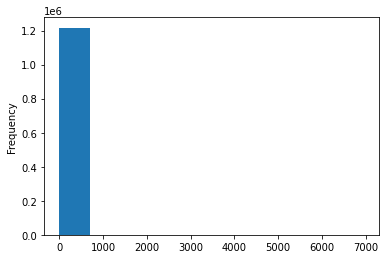

In [ ]:
taxi["fare"].plot(kind = "hist")

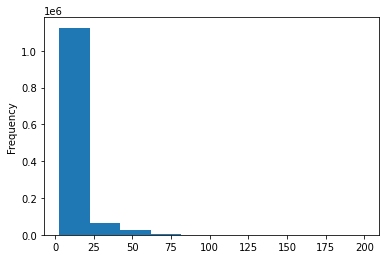

In [ ]:
# Dropping far-off fares because they do not seem to be representative
taxi = taxi[taxi["fare"] < 200]
taxi["fare"].plot(kind = "hist")

In [ ]:
taxi["tip"].describe()

count    1.216797e+06
mean     1.963024e+00
std      2.244803e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.860000e+00
75%      2.700000e+00
max      3.330000e+02
Name: tip, dtype: float64

In [ ]:
# Tip seems to be okay - no negative values!

Now for the fun part: let's ask questions!

- Let's investigate the potential effects of increasing the number of people in a taxi. Does it affect how likely and how much someone is to tip? Does it relate to how far they travel?
- I'm nosy, so I also want to know - how much do people generally tip?
- Are there differences in volume of passengers during different times of day? 
- What about payment type - who is still using cash, and at what time of day? Are they groups?


In [ ]:
# Creating a function and applying it to a pandas series
def pass_sort(row):
  if row['passengers'] > 3:
      return 'Four or more'
  if row['passengers'] > 1:
      return 'Two to three'
  if row['passengers'] == 1:
      return 'One'

taxi["passenger_type"] = taxi.apply(lambda row: pass_sort(row), axis = 1)

# Use column manipulation to create new columns
taxi["tip_pct"] = taxi['tip'] / taxi['fare']
taxi["pickup_time"] = taxi["pickup"].dt.time
taxi.head()

# Reshaping data
taxi_pivot = taxi.pivot(columns = "passenger_type", values = ["pickup_time", "tip_pct"])
taxi_pivot.head()


,pickup,dropoff,passengers,distance,payment_type,fare,extra,tax,tip,tolls,...,congestion_tax,airport_fee,pickup_day,pickup_year,passenger_type,tip_pct,pickup_time,rec,medtippct,above_medtippct
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,2,8.0,3.0,0.5,0.00,0.0,...,2.5,NaN,1,2021,One,0.000000,00:30:10,1,0.24,False
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,2,3.0,0.5,0.5,0.00,0.0,...,0.0,NaN,1,2021,One,0.000000,00:51:20,1,0.24,False
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1,42.0,0.5,0.5,8.65,0.0,...,0.0,NaN,1,2021,One,0.205952,00:43:30,1,0.24,False
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1,16.5,0.5,0.5,4.06,0.0,...,2.5,NaN,1,2021,One,0.246061,00:31:49,1,0.24,True
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1,8.0,3.0,0.5,2.35,0.0,...,2.5,NaN,1,2021,One,0.293750,00:16:29,1,0.24,True


pickup_time                             tip_pct            \
passenger_type Four or more       One Two to three Four or more       One   
0                       NaN  00:30:10          NaN          NaN       0.0   
1                       NaN  00:51:20          NaN          NaN       0.0   
2                       NaN  00:43:30          NaN          NaN  0.205952   
4                       NaN  00:31:49          NaN          NaN  0.246061   
5                       NaN  00:16:29          NaN          NaN   0.29375   
...                     ...       ...          ...          ...       ...   
1271412                 NaN       NaN     23:58:47          NaN       NaN   
1271413                 NaN  23:07:54          NaN          NaN       0.0   
1271414                 NaN  23:30:45          NaN          NaN       0.0   
1271415                 NaN       NaN     23:09:52          NaN       NaN   
1271416                 NaN       NaN     23:26:15          NaN       NaN   

                             
passenger_type Two to three  
0                       NaN  
1                       NaN  
2                       NaN  
4                       NaN  
5                       NaN  
...                     ...  
1271412                 0.0  
1271413                 NaN  
1271414                 NaN  
1271415                 0.0  
1271416            0.301333  

[1216797 rows x 6 columns]

In [ ]:
# Can also use transform to add a column (like R mutate)
taxi["rec"] = 1
taxi["medtippct"] = taxi.groupby("rec")["tip_pct"].transform('median')
# Transform must have a grouping variable

# And can also use transform and apply to add a column and make a comparison 
# at the same time
taxi["above_medtippct"] = taxi["tip_pct"].transform(lambda x: x > x.median())

taxi[["tip_pct", "medtippct", "above_medtippct"]].head()



,tip_pct,medtippct,above_medtippct
0,0.000000,0.24,False
1,0.000000,0.24,False
2,0.205952,0.24,False
4,0.246061,0.24,True
5,0.293750,0.24,True


In [ ]:
taxi_pivot.head()

pickup_time                             tip_pct            \
passenger_type Four or more       One Two to three Four or more       One   
0                       NaN  00:30:10          NaN          NaN       0.0   
1                       NaN  00:51:20          NaN          NaN       0.0   
2                       NaN  00:43:30          NaN          NaN  0.205952   
4                       NaN  00:31:49          NaN          NaN  0.246061   
5                       NaN  00:16:29          NaN          NaN   0.29375   

                             
passenger_type Two to three  
0                       NaN  
1                       NaN  
2                       NaN  
4                       NaN  
5                       NaN

In [ ]:
# Collapse to find average pickup time and tip_pct
taxi_pivot["tip_pct"].aggregate("median")
taxi_pivot["tip_pct"].aggregate("mean")

passenger_type
Four or more    0.240000
One             0.240625
Two to three    0.237500
dtype: float64

passenger_type
Four or more    0.203753
One             0.204092
Two to three    0.199911
dtype: float64

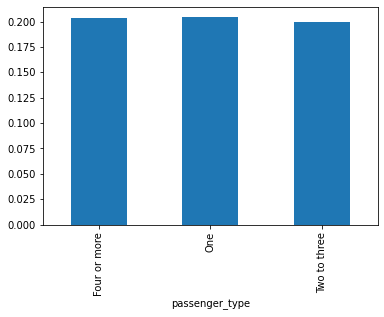

In [ ]:
taxi_pivot["tip_pct"].aggregate("mean").plot(kind = "bar")

Text(0.5, 1.0, 'Passengers vs distance')

Text(0.5, 0, 'Passenger number')

Text(0, 0.5, 'Distance (mi)')

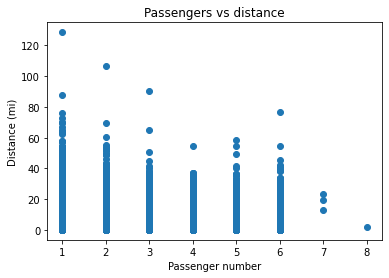

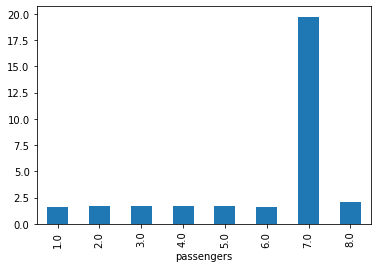

Text(0.5, 1.0, 'Passengers vs tip percentage')

Text(0, 0.5, 'Passenger number')

Text(0.5, 0, 'Distance (mi)')

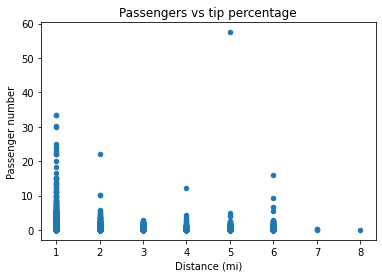

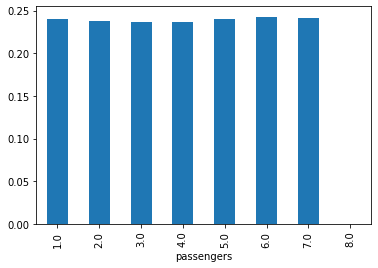

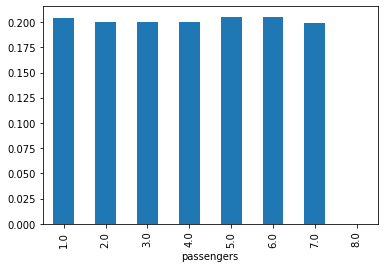

In [ ]:
# Visualize tip percent and distance by passenger number

plt.scatter(x = taxi["passengers"], y = taxi["distance"])
plt.title('Passengers vs distance')
plt.xlabel('Passenger number')
plt.ylabel('Distance (mi)')
plt.show()

taxi.groupby("passengers")["distance"].median().plot(kind = "bar")
plt.show()

taxi.plot.scatter(x="passengers", y="tip_pct")
plt.title('Passengers vs tip percentage')
plt.ylabel('Passenger number')
plt.xlabel('Distance (mi)')
plt.show()

taxi.groupby("passengers")["tip_pct"].aggregate("median").plot(kind = "bar")
plt.show()

taxi.groupby("passengers")["tip_pct"].aggregate("mean").plot(kind = "bar")
plt.show()

## **Where to find data**
### *(using CU Libraries, Google datasets, US government agencies, and many more)*
1. Types of data: tabular (survey, transaction, summary, etc.), geospatial, text
2. List of potential sources for each of the above
3. Tools to collect your own data (mTurk or qualtrics for survey data, scraping for text data)

## **Topics not covered today**
***
A list of all the topics that you can dive deeper into (asterisks are by the ones that are most important):
- github*
- statistics*
- communication / translation*
- visualization*
- NLP
- ML
- Cloud computing + access
- geospatial data
- applications